<a href="https://colab.research.google.com/github/jarvis-2003/deeplearning/blob/main/02_gathering_all_together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# create a dataset first
# we need a database that fits linear
bias = 0.3
weight = 0.7
start = 0
stop = 1
step = 0.02
X = torch.arange(start,stop,step).unsqueeze(dim= 1)
# created the dataset
y = weight*X + bias
X.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [89]:
# distribute 80% of data to training set and 20 percent to test
required_percent = int(0.8*len(X))
X_train = X[:required_percent]
y_train = y[:required_percent]
X_test = X[required_percent:]
y_test = y[required_percent:]

type(X_train)

torch.Tensor

In [90]:
def plot_train_test(x_train_data = X_train , y_train_data = y_train , x_test_data = X_test , y_test_data = y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(x_train_data,y_train_data,c = "b",s=4 ,label = 'training data')
  plt.scatter(x_test_data,y_test_data,c="r",s=4,label = "testing data")

  if predictions is not None:
    plt.scatter(x_test_data,predictions,c="g",s=4,label="prediction")
  plt.legend()
  plt.show()

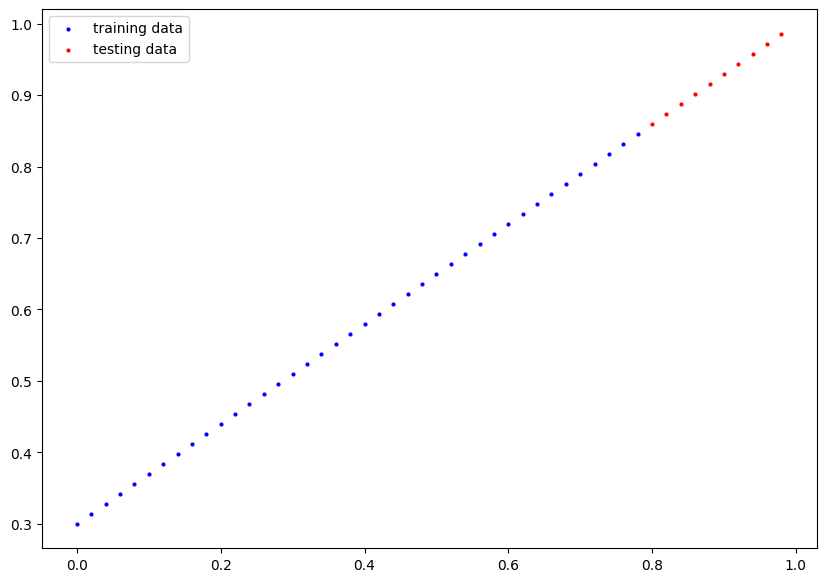

In [91]:
plot_train_test()

In [92]:
# Building a Pytorch linear model
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    # we are using nn.Linear for creating the model parameters
    self.linear_layer = torch.nn.Linear(in_features=1,
                                        out_features=1)
  def forward(self,x: torch.Tensor):
    return self.linear_layer(x)
#mannual_seed
torch.manual_seed(42)
model = LinearRegressionModel()
model,model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [93]:
with torch.inference_mode():
   y_pred = model(X_test)
y_pred

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

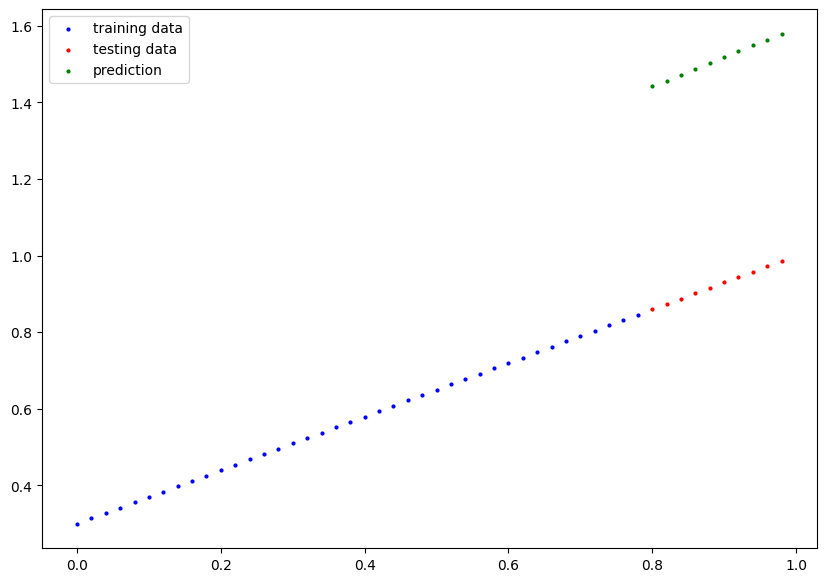

In [94]:
plot_train_test(predictions=y_pred.detach().numpy())

In [95]:
model.parameters()

<generator object Module.parameters at 0x79f5cecdd7e0>

In [96]:
# defining a loss function and optimizer
loss_fn = torch.nn.L1Loss()
# GRADIENT DESCENT OPTIMIZER
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [97]:
epochs = 200
train_loss = []
test_loss_details = []
epochs_count = []

for epoch in range(epochs):

    # -------- TRAIN --------
    model.train()
    y_train_pred = model(X_train)
    loss = loss_fn(y_train_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # -------- TEST --------
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)

    # -------- LOG --------
    if epoch % 10 == 0:
        train_loss.append(loss.item())
        test_loss_details.append(test_loss.item())
        epochs_count.append(epoch)


In [98]:
test_loss_details[:10],train_loss[:10],epochs_count[:10]

([0.5739762187004089,
  0.4392663538455963,
  0.30455657839775085,
  0.16984674334526062,
  0.03513689711689949,
  0.04784906655550003,
  0.04580312222242355,
  0.0375305712223053,
  0.029944902285933495,
  0.02167237363755703],
 [0.5551779866218567,
  0.4399680495262146,
  0.3247582018375397,
  0.20954827964305878,
  0.09433844685554504,
  0.023886386305093765,
  0.0199567973613739,
  0.016517987474799156,
  0.013089170679450035,
  0.009653178043663502],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

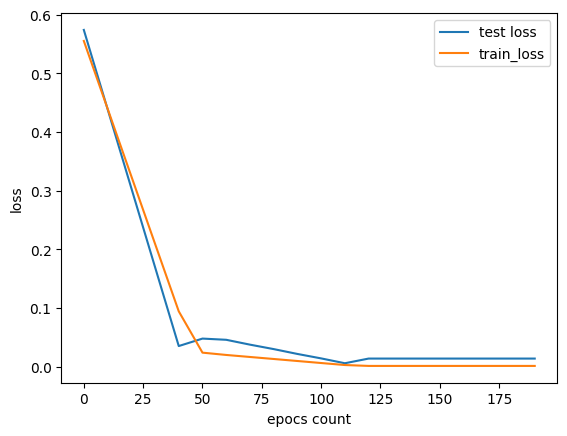

In [101]:
plt.plot(epochs_count,test_loss_details,label = "test loss")
plt.plot(epochs_count,train_loss,label = "train_loss")
plt.xlabel("epocs count")
plt.ylabel("loss")
plt.legend()
plt.show()

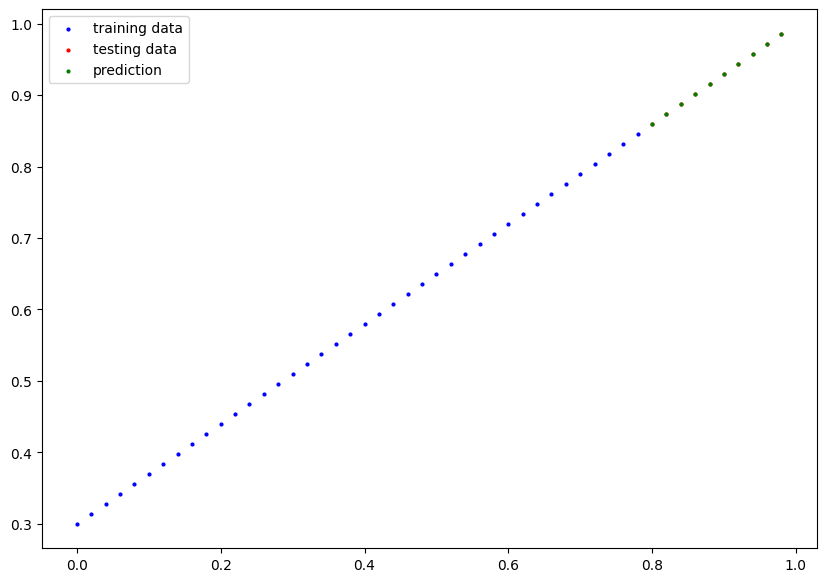

In [102]:
with torch.inference_mode():
  y_pred_graph = model(X_test)
plot_train_test(predictions=y_pred_graph)

In [103]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [115]:
# Saving a model
path = '/content/models/linearRegressionV2.pth'
torch.save(model.state_dict(),path)

## Using the saved model steps to use or load it
1. Create a new instace of the new model of the class where forward method was definded -> `load_model = LinearRegressionModel()`
2. load the pth state dict file --> `load_model.load_state_dict(torch.load(**PATH OF THE FILE**))`

3. Then `load_model.eval()`

In [119]:
torch.manual_seed(42)
load_model = LinearRegressionModel()
load_model.load_state_dict(torch.load("/content/models/linearRegressionV2.pth"))

<All keys matched successfully>

In [120]:
load_model.eval()
load_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])